## 모델 적용 및 평가
1. 로지스틱 회귀 모델
2. XGBoost 

* 하이퍼파라미터 고정
    - test_size=0.2
    - random_state=42 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [3]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
# 1. 데이터 로드 완료

# 2. 데이터 전처리

# 이진으로 분류된 데이터를 제외하고 범주형 데이터를 위한 전처리
columns = ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
scaler = StandardScaler()
df[columns] =scaler.fit_transform(df[columns])

# 3. 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델 적용 및 평가

# 4_1. 로지스틱 모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 평가
print(f'훈련 점수: {lr.score(X_train, y_train)}, 테스트 점수: {lr.score(X_test, y_test)}') 

# 모델 성능 평가
y_pred_lr = lr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} 모델 성능 평가")
    print("accuracy_score", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print(f'f1_score: {f1_score(y_test, y_pred)}')

evaluate_model(y_test, y_pred_lr, 'LogisticRegression')

# 4-2. XGBoost 모델 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 모델 성능 평가
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
# print(classification_report(y_test, y_pred_xgb))

훈련 점수: 0.9334375, 테스트 점수: 0.91625

LogisticRegression 모델 성능 평가
accuracy_score 0.91625
precision: 0.8729281767955801
f1_score: 0.825065274151436

XGBoost 모델 성능 평가
accuracy_score 0.9275
precision: 0.8829787234042553
f1_score: 0.8512820512820513


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Logistic_Regression 최적의 파라미터 찾아보기

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

random_search = RandomizedSearchCV(LogisticRegression(), param_grid, cv=5)
random_search.fit(X_train, y_train)


# 최적의 파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

# 최적의 모델로 예측
best_lr = random_search.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
y_pred_proba_best_lr = best_lr.predict_proba(X_test)[:, 1]

# 성능 평가
evaluate_model(y_test, y_pred_best_lr, 'Logistic')

### 결론
- 최적의 하이퍼파라미터: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

- Logistic 모델 성능 평가
- accuracy_score 0.915
- precision: 0.8681318681318682
- f1_score: 0.8229166666666666


- 이전과 비교   
(기본값 : C: 1.0 (정규화 강도)
penalty: 'l2' (L2 정규화)
solver: 'lbfgs' (최적화 알고리즘))


accuracy_score 0.91625
precision: 0.8729281767955801
f1_score: 0.825065274151436

### 기본값에서 조금 다르게 파라미터가 나왓지만 점수의 변화는 크지 않다!


-------------

## XGBoost 최적의 파라미터 찾아보기

In [6]:
from sklearn.model_selection import GridSearchCV

# XGBoost 모델 객체 생성
xgb = XGBClassifier(eval_metric='logloss', enable_categorical=False)

# 하이퍼파라미터 후보 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# GridSearchCV 실행
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
y_pred_proba_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# 성능 평가
evaluate_model(y_test, y_pred_best_xgb, 'XGB')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

XGB 모델 성능 평가
accuracy_score 0.93375
precision: 0.9027027027027027
f1_score: 0.8630490956072352


### 결론
- 최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
- 성능 향상
    - accuracy_score 0.93375
    - precision: 0.9027027027027027
    - f1_score: 0.8630490956072352

- 이전 결과
    - accuracy_score 0.9275
    - precision: 0.8829787234042553
    - f1_score: 0.8512820512820513

### 이전 결과에 비해 점수 모두 소폭 상승

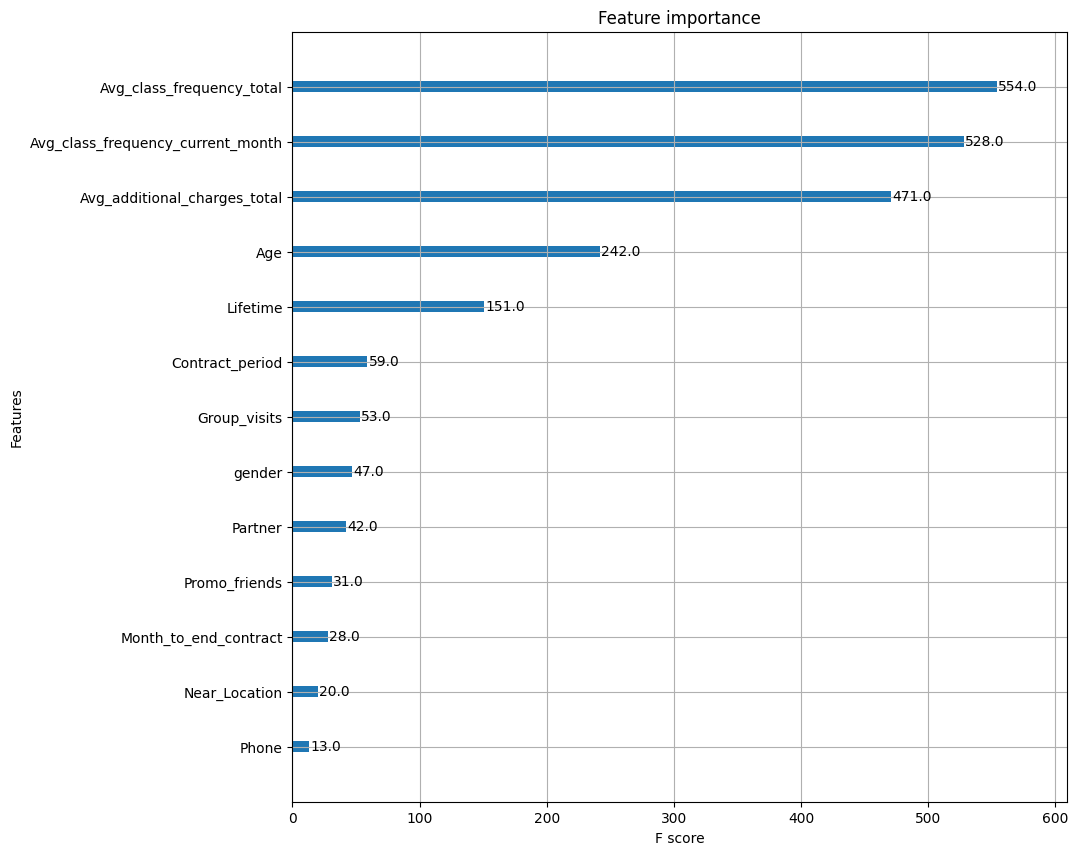

In [7]:
# 특성 중요도 시각화
from xgboost import plot_importance
xgb.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(xgb, ax =ax) 
plt.show()   

## ROC_auc Score 적용 및 시각화

In [8]:
from sklearn.metrics import roc_auc_score

# 모델 성능 평가

# logisticRegression Model
y_pred_lr = lr.predict(X_test)
y_pred_lr_proba = lr.predict_proba(X_test)[:, 1]
# Roc_auc 평가 확인
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr_proba))

# XGBoost Model - Best params 적용 전
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_proba = xgb.predict_proba(X_test)[:, 1]


print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_proba))  
  

# 적용 후
y_pred_best_xgb = best_xgb.predict(X_test)
y_pred_proba_best_xgb = best_xgb.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_best_xgb))


ROC-AUC Score: 0.9693615682638498
ROC-AUC Score: 0.9695685287592304
ROC-AUC Score: 0.9774495844233252


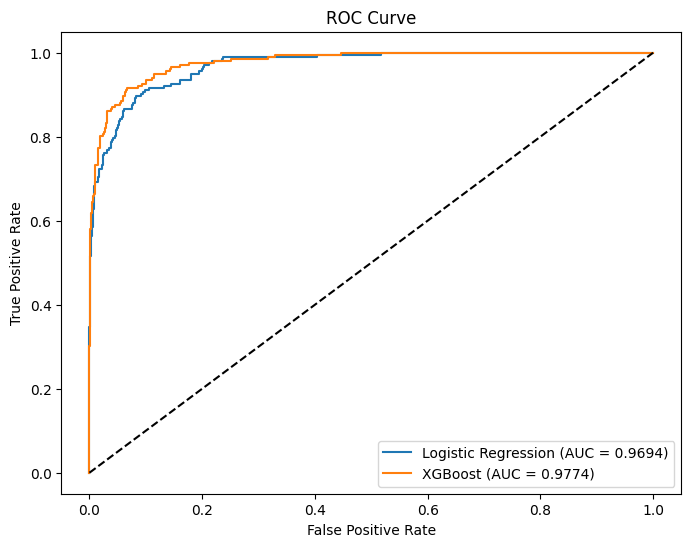

In [9]:
# Roc_auc 평가 확인
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Roc_curve 시각화
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_proba):.4f})')
    
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_pred_lr_proba, "Logistic Regression")
plot_roc_curve(y_test, y_pred_proba_best_xgb, "XGBoost")

# 대각선 기준선 (무작위 예측)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

---------------------

### minmax 전처리 사용

## 결론
- stadardscaler 사용한 것보다 점수가 미세하게 낮은 걸 확인
 

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# 1. 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')

# 2. 전처리
# min_maxscaler
columns = ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
encoder = MinMaxScaler()
df[columns] = encoder.fit_transform(df[columns])

# 3. 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 잘 분리됬는지 확인 
# print(X_train.shape, X_test.shape) # (3200, 13) (800, 13)

# 4. 모델
# 4_1. 로지스틱 모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 평가
print(f'훈련 점수: {lr.score(X_train, y_train)}, 테스트 점수: {lr.score(X_test, y_test)}') 

# 모델 성능 평가
y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, 'LogisticRegression')

# 4-2. XGBoost 모델 
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_proba = xgb.predict_proba(X_test)[:, 1]

# 모델 성능 평가
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_proba))  
print(classification_report(y_test, y_pred_xgb))

훈련 점수: 0.9175, 테스트 점수: 0.8975

LogisticRegression 모델 성능 평가
accuracy_score 0.8975
precision: 0.8409090909090909
f1_score: 0.783068783068783

XGBoost 모델 성능 평가
accuracy_score 0.9275
precision: 0.8829787234042553
f1_score: 0.8512820512820513
ROC-AUC Score: 0.9695685287592304
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       598
           1       0.88      0.82      0.85       202

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.93      0.93      0.93       800



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------


## 잘못된 전처리

- one_hot 인코딩 방식은 문자열로 적용되어 있는 컬럼에 적합한 전처리 과정!
- 모두 숫자로 구성되어 있는 현재 데이터에서는 의미있는 전처리 과정이 아님!

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
# 1. 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')

# 2. 전처리
# one-hot 인코딩
columns = ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# 해당 에러가 왜 생기는지 궁금...
# df[columns] = encoder.fit_transform(df[columns])
#     # ValueError: Columns must be same length as key
# 이유: 기존 df의 형식 # (4000, 14) 과 endocer을 적용하려는 df[columns]의 shape (4000, 5)가 다르기 때문!

# 해결
encoded_columns = encoder.fit_transform(df[columns])

# 변환된 데이터를 DataFrame으로 변환 후 기존 df와 결합
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns))
df = df.drop(columns=columns).reset_index(drop=True)
df = pd.concat([df, df_encoded], axis=1)
df

# 3. 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델
# 4_1. 로지스틱 모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 평가
print(f'훈련 점수: {lr.score(X_train, y_train)}, 테스트 점수: {lr.score(X_test, y_test)}') 

# 모델 성능 평가
y_pred_lr = lr.predict(X_test)


evaluate_model(y_test, y_pred_lr, 'LogisticRegression')

# 4-2. XGBoost 모델 
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 모델 성능 평가
evaluate_model(y_test, y_pred_xgb, 'XGBoost')


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련 점수: 0.9446875, 테스트 점수: 0.8675

LogisticRegression 모델 성능 평가
accuracy_score 0.8675
precision: 0.7580645161290323
f1_score: 0.7268041237113402


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost 모델 성능 평가
accuracy_score 0.86875
precision: 0.7487179487179487
f1_score: 0.7355163727959698


# 최종 결론

1. 데이터 전처리
standardscaler를 사용하는 것이 minmaxscaler 보다 더 적합하다

2. 모델 사용 
 Logistic < XGBoost 결과가 조금 더 좋은 편

3. GridsearchCV & RandomSerchCV  사용해서 최적의 파라미터 찾고 모델에 적용 및 점수 비교
- Logistic의 경우,
    - 기본값과 파라미터의 차이가 존재하긴 하지만 점수에서 매우 미미한 차이를 보임
- XGBoost의 경우
    - 최적의 파라미터로 모델을 실행했을 때, accuracy, precision, f1 score , Roc_Auc 점수 모두 0.01이상 증가함 (큰 차이는 X)
    - feature_importance에서 수업 참여 빈도 -> 추가 지출 비용 -> 나이 순으로 중요도가 높았다.

4. Roc_Auc Score
- 시각화해놓은 ROC_curve에서 쉽게 확인할 수 있듯이
- 두 모델 모두 0.9694, 0.9774로 높은 점수를 내고 있다!
